
# Project 4: Movie Analysis - Exploring Patterns and Insights

## Introduction

I analyzed the 'movies' dataset from vega-dataset to uncover trends and insights about the movie industry.
We will explore factors influencing box office performance, including budget, ratings, and genres.

### Goals:
1. Perform data wrangling to clean and prepare the data.
2. Conduct Exploratory Data Analysis (EDA) to understand relationships and trends.
3. Provide insights about the highest-grossing movies, genre popularity, and rating impacts.

---



## Analytical Questions Explored

This analysis aims to uncover key insights about the movie industry using the `movie_raw.csv` dataset. The primary questions answered include:

### 1. Trends in Budget and Revenue Over Time
- How have production budgets and box office revenue changed over the years?
- Are there noticeable trends in movie profitability?

### 2. Genre and Rating Impact on Revenue
- Which movie genres are most successful at the box office?
- How do different content ratings (e.g., PG, R) influence box office performance?

### 3. The Role of IMDb and Rotten Tomatoes Ratings
- Is there a correlation between movie ratings and financial success?
- Do critically acclaimed movies generate more revenue?

### 4. Return on Investment (ROI) Analysis
- Which movies have the highest ROI?
- Are lower-budget films more profitable in terms of ROI?

This notebook answers these questions through data wrangling, exploratory data analysis (EDA), and visualizations.



## Data Wrangling

### Steps:
1. **Inspect the data**: Understand its structure, types, and missing values.
2. **Handle missing data**: Impute or drop as necessary.
3. **Create new features**: Add derived metrics or transform data for analysis.


In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns

# Load the dataset
data_path = 'movie_raw.csv'
movies_df = pd.read_csv(data_path)

# Display basic information
movies_df.info()
movies_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   3200 non-null   object 
 1   US_Gross                3194 non-null   float64
 2   Worldwide_Gross         3194 non-null   float64
 3   US_DVD_Sales            564 non-null    float64
 4   Production_Budget       3200 non-null   float64
 5   Release_Date            3201 non-null   object 
 6   MPAA_Rating             2596 non-null   object 
 7   Running_Time_min        1209 non-null   float64
 8   Distributor             2969 non-null   object 
 9   Source                  2836 non-null   object 
 10  Major_Genre             2926 non-null   object 
 11  Creative_Type           2755 non-null   object 
 12  Director                1870 non-null   object 
 13  Rotten_Tomatoes_Rating  2321 non-null   float64
 14  IMDB_Rating             2988 non-null   

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,Jun 12 1998,R,NaN,Gramercy,NaN,NaN,NaN,NaN,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,Aug 07 1998,R,NaN,Strand,NaN,Drama,NaN,NaN,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,Aug 28 1998,NaN,NaN,Lionsgate,NaN,Comedy,NaN,NaN,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,Sep 11 1998,NaN,NaN,Fine Line,NaN,Comedy,NaN,NaN,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,NaN,1000000.0,Oct 09 1998,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,NaN,62.0,3.4,165.0


In [3]:
# Handle missing values
# Example: Drop rows with excessive missing data, impute where feasible
movies_df.dropna(subset=['US_Gross', 'Worldwide_Gross','Production_Budget'], inplace=True)

# Convert Release_Date to datetime
movies_df['Release_Date'] = pd.to_datetime(movies_df['Release_Date'], errors='coerce')

# Create a new column for Profit (Worldwide Gross - Production Budget)
movies_df['Profit'] = movies_df['Worldwide_Gross'] - movies_df['Production_Budget']

# Create a new column for ROI (Return on Investment)
movies_df['ROI'] = (movies_df['Profit'] / movies_df['Production_Budget']) * 100
movies_df['ROI Ranges'] = pd.cut(movies_df['ROI'], bins=[-np.inf,-2.5,0,2.5,np.inf], labels = ['< -2.5','-2.5 to 0','0 to 2.5','> 2.5'])

# Create a new column for rescaled Rotten Tomatoes Rating
movies_df['Scaled RT Rating'] = movies_df['Rotten_Tomatoes_Rating'] / 10

# Display cleaned data information
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3193 entries, 0 to 3200
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Title                   3192 non-null   object        
 1   US_Gross                3193 non-null   float64       
 2   Worldwide_Gross         3193 non-null   float64       
 3   US_DVD_Sales            563 non-null    float64       
 4   Production_Budget       3193 non-null   float64       
 5   Release_Date            3193 non-null   datetime64[ns]
 6   MPAA_Rating             2593 non-null   object        
 7   Running_Time_min        1208 non-null   float64       
 8   Distributor             2967 non-null   object        
 9   Source                  2833 non-null   object        
 10  Major_Genre             2924 non-null   object        
 11  Creative_Type           2753 non-null   object        
 12  Director                1869 non-null   object       


## Exploratory Data Analysis (EDA)

### Key Questions:
1. What are the trends in production budgets and box office gross over time?
2. Which genres and ratings are associated with higher box office performance?
3. How do IMDb and Rotten Tomatoes ratings correlate with financial success?

### Steps:
- Analyze distribution of financial and rating metrics.
- Visualize trends over time.
- Investigate relationships between features (e.g., budget vs. gross, genre vs. ratings).


In [4]:
movies_df.describe()

,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,Running_Time_min,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes,Profit,ROI,Scaled RT Rating
count,3.193000e+03,3.193000e+03,5.630000e+02,3.193000e+03,3193,1208.000000,2315.000000,2982.000000,2982.000000,3.193000e+03,3.193000e+03,2315.000000
mean,4.399692e+07,8.534996e+07,3.492037e+07,3.112141e+07,1998-12-20 01:58:36.567491456,110.202815,54.253996,6.282763,29953.632461,5.422855e+07,1.055750e+03,5.425400
min,0.000000e+00,0.000000e+00,6.184540e+05,2.180000e+02,1928-12-31 00:00:00,46.000000,1.000000,1.400000,18.000000,-1.300000e+08,-1.000000e+02,0.100000
25%,5.490423e+06,8.025872e+06,9.906074e+06,6.800000e+06,1996-09-27 00:00:00,95.000000,30.000000,5.600000,4837.750000,-2.995345e+06,-3.218333e+01,3.000000
50%,2.200630e+07,3.107742e+07,2.013058e+07,2.000000e+07,2001-12-14 00:00:00,107.000000,55.000000,6.400000,15148.500000,9.546543e+06,8.157798e+01,5.500000
75%,5.608397e+07,9.738796e+07,3.787556e+07,4.200000e+07,2005-12-16 00:00:00,121.000000,80.000000,7.200000,35878.000000,6.067316e+07,2.961429e+02,8.000000
max,7.601676e+08,2.767891e+09,3.525821e+08,3.000000e+08,2046-12-31 00:00:00,222.000000,100.000000,9.200000,519541.000000,2.530891e+09,1.291703e+06,10.000000
std,6.256443e+07,1.499704e+08,4.593376e+07,3.560488e+07,NaN,20.176793,28.059763,1.252416,44970.871354,1.290299e+08,2.500874e+04,2.805976


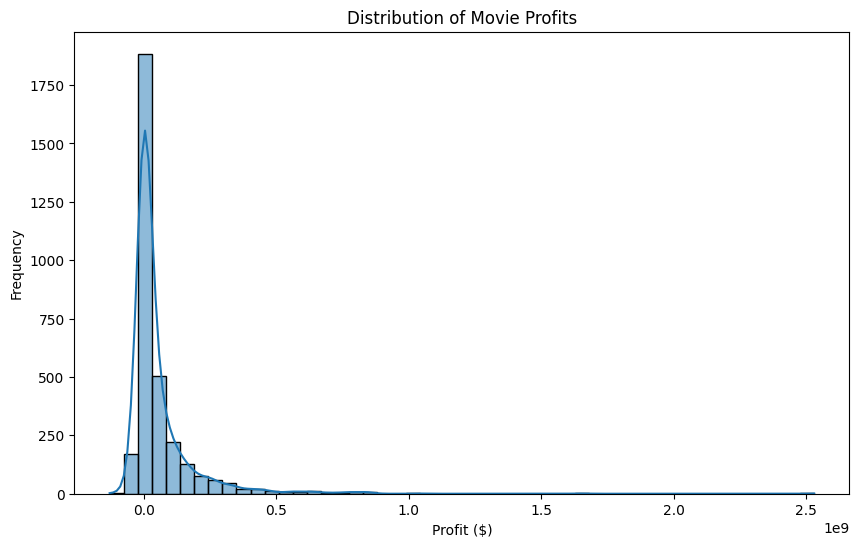

In [5]:
# 1. Distribution of Movie Profits
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['Profit'], bins=50, kde=True)
plt.title('Distribution of Movie Profits')
plt.xlabel('Profit ($)')
plt.ylabel('Frequency')
plt.show()

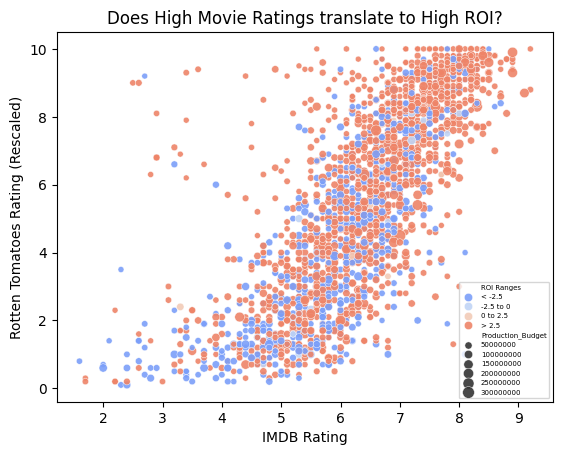

In [ ]:
# 2. Distribution of Ratings with Production Budget and ROI
sns.scatterplot(x='IMDB_Rating', y='Scaled RT Rating', hue='ROI Ranges', size='Production_Budget', data=movies_df, palette='coolwarm', alpha = 0.9)
plt.legend(fontsize='5')
plt.title('Does High Movie Ratings translate to High ROI?')
plt.xlabel('IMDB Rating')
plt.ylabel('Rotten Tomatoes Rating (Rescaled)')
plt.show()

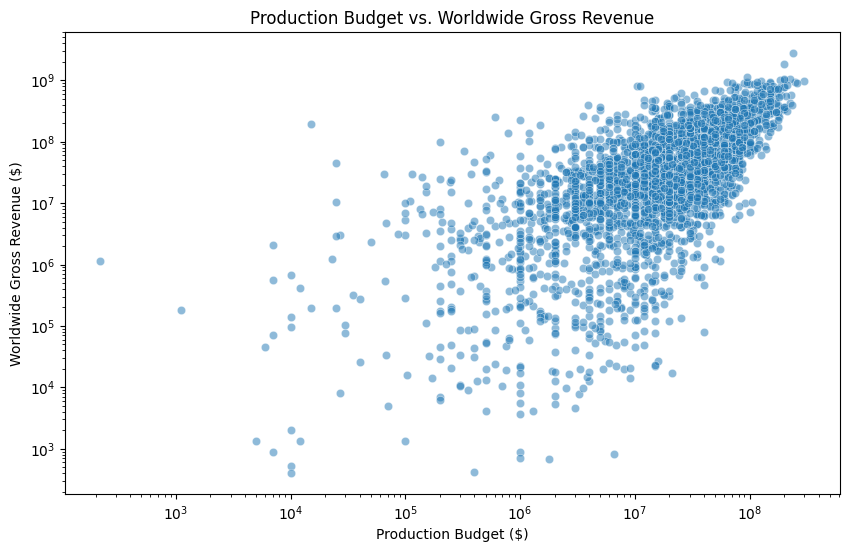

In [10]:
# 3. Budget vs. Worldwide Gross Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Production_Budget', y='Worldwide_Gross', data=movies_df, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title('Production Budget vs. Worldwide Gross Revenue')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross Revenue ($)')
plt.show()

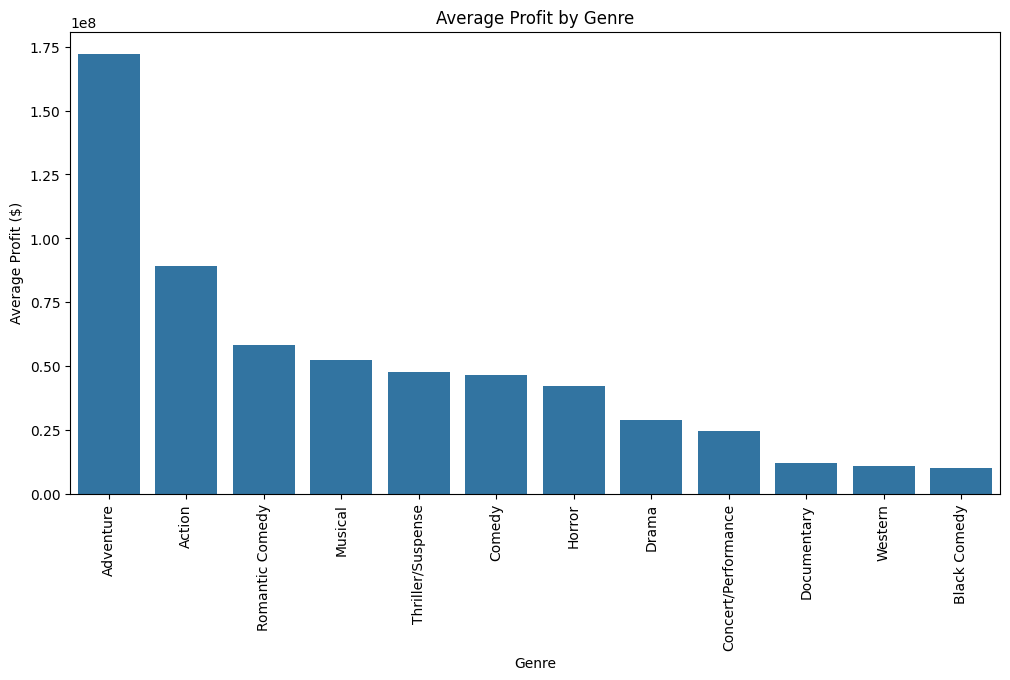

In [11]:
# 4. Average Profit by Genre
genre_profit = movies_df.groupby('Major_Genre')['Profit'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_profit.index, y=genre_profit.values)
plt.xticks(rotation=90)
plt.title('Average Profit by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Profit ($)')
plt.show()

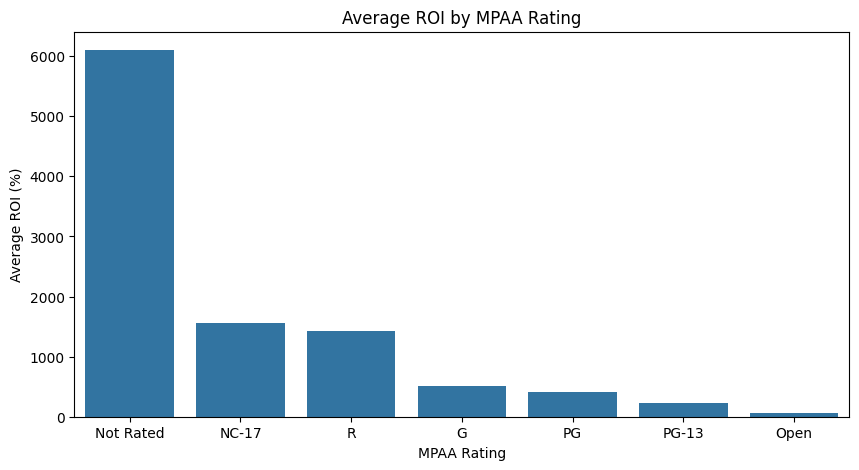

In [12]:
# 5. ROI by MPAA Rating
mpaa_roi = movies_df.groupby('MPAA_Rating')['ROI'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=mpaa_roi.index, y=mpaa_roi.values)
plt.title('Average ROI by MPAA Rating')
plt.xlabel('MPAA Rating')
plt.ylabel('Average ROI (%)')
plt.show()

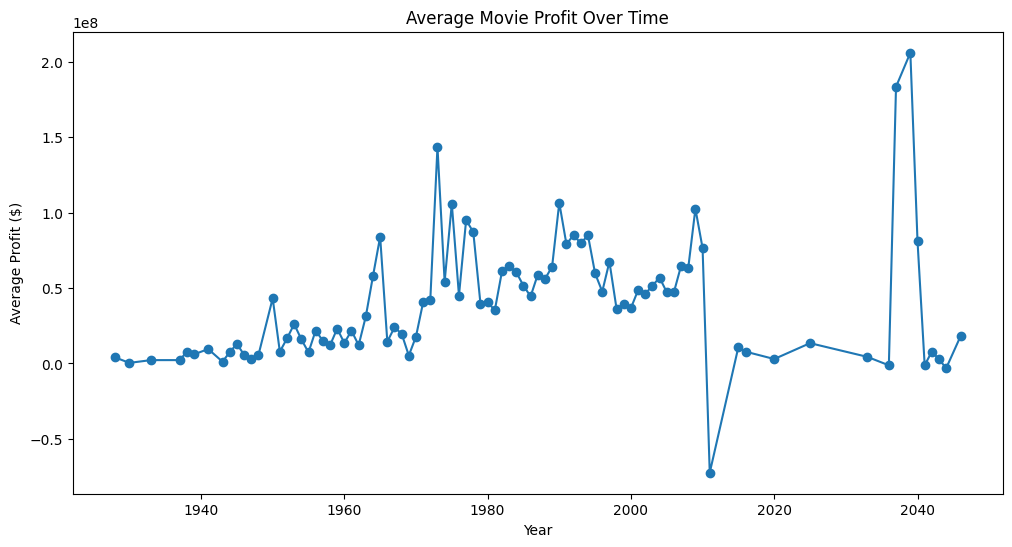

In [13]:
# 6. Profit Trends Over Time
movies_df['Year'] = movies_df['Release_Date'].dt.year
yearly_profit = movies_df.groupby('Year')['Profit'].mean()
plt.figure(figsize=(12, 6))
plt.plot(yearly_profit.index, yearly_profit.values, marker='o')
plt.title('Average Movie Profit Over Time')
plt.xlabel('Year')
plt.ylabel('Average Profit ($)')
plt.show()

c:\Users\nixon\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


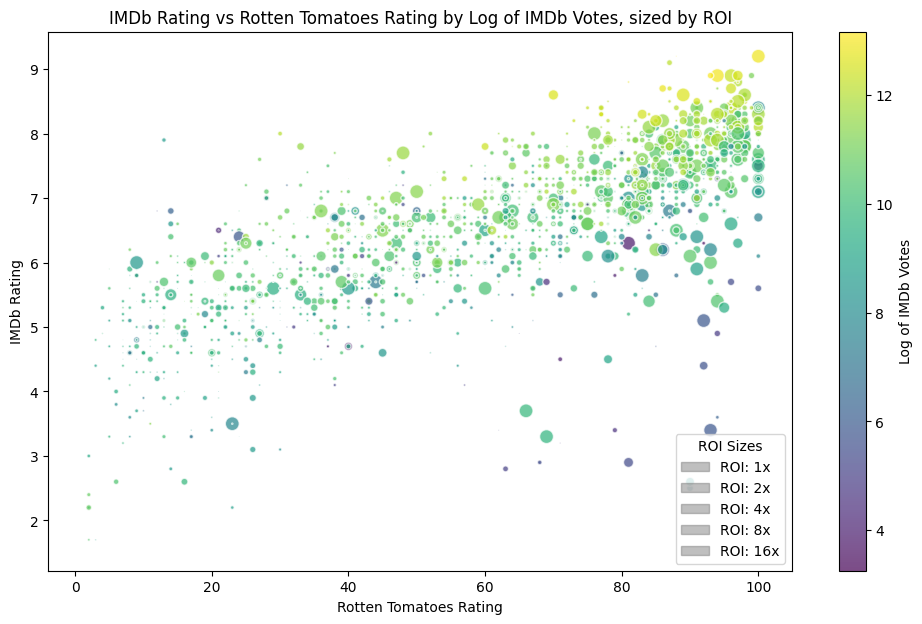

In [19]:
# 7. Scatterplot chart for IMDb Rating vs Rotten Tomatoes Rating (Votes vs ROI)
plt.figure(figsize=(12, 7))

# Ensure necessary columns are available and clean missing values
ratings_df = movies_df.dropna(subset=['IMDB_Rating', 'Rotten_Tomatoes_Rating', 'IMDB_Votes', 'ROI'])

# Scale ROI for bubble size
bubble_size = ratings_df['ROI'].clip(upper=2000) / 20  # Limit extreme values for better visualization

# Scatter plot with IMDb Rating vs Rotten Tomatoes Rating
scatter = plt.scatter(
    ratings_df['Rotten_Tomatoes_Rating'], ratings_df['IMDB_Rating'],
    s=bubble_size, c=np.log1p(ratings_df['IMDB_Votes']), cmap='viridis', alpha=0.7, edgecolors="w"
)

# Add colorbar to indicate IMDb votes (log scale)
cbar = plt.colorbar(scatter)
cbar.set_label("Log of IMDb Votes")

# Customize plot labels and title
plt.title("IMDb Rating vs Rotten Tomatoes Rating by Log of IMDb Votes, sized by ROI")
plt.xlabel("Rotten Tomatoes Rating")
plt.ylabel("IMDb Rating")


# Create a legend for bubble sizes
legend_sizes = [1, 2, 4, 8, 16]  # Example ROI multipliers
legend_patches = [mpatches.Circle((0, 0), size*10, color='gray', alpha=0.5, label=f"ROI: {size}x") for size in legend_sizes]
plt.legend(handles=legend_patches, title="ROI Sizes", loc="lower right")

plt.show()


In [23]:
# Extract year and month from Release_Date
movies_df['Year'] = movies_df['Release_Date'].dt.year
movies_df['Month'] = movies_df['Release_Date'].dt.month_name()

# Aggregate average and median worldwide gross by Year and Month
gross_by_year_month = movies_df.groupby(['Year', 'Month'])['Worldwide_Gross'].agg(['mean', 'median']).reset_index()

# Pivot tables for heatmap visualization
avg_gross_pivot = gross_by_year_month.pivot(index='Month', columns='Year', values='mean')
median_gross_pivot = gross_by_year_month.pivot(index='Month', columns='Year', values='median')

# Reorder months for proper visualization
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
avg_gross_pivot = avg_gross_pivot.reindex(month_order)
median_gross_pivot = median_gross_pivot.reindex(month_order)

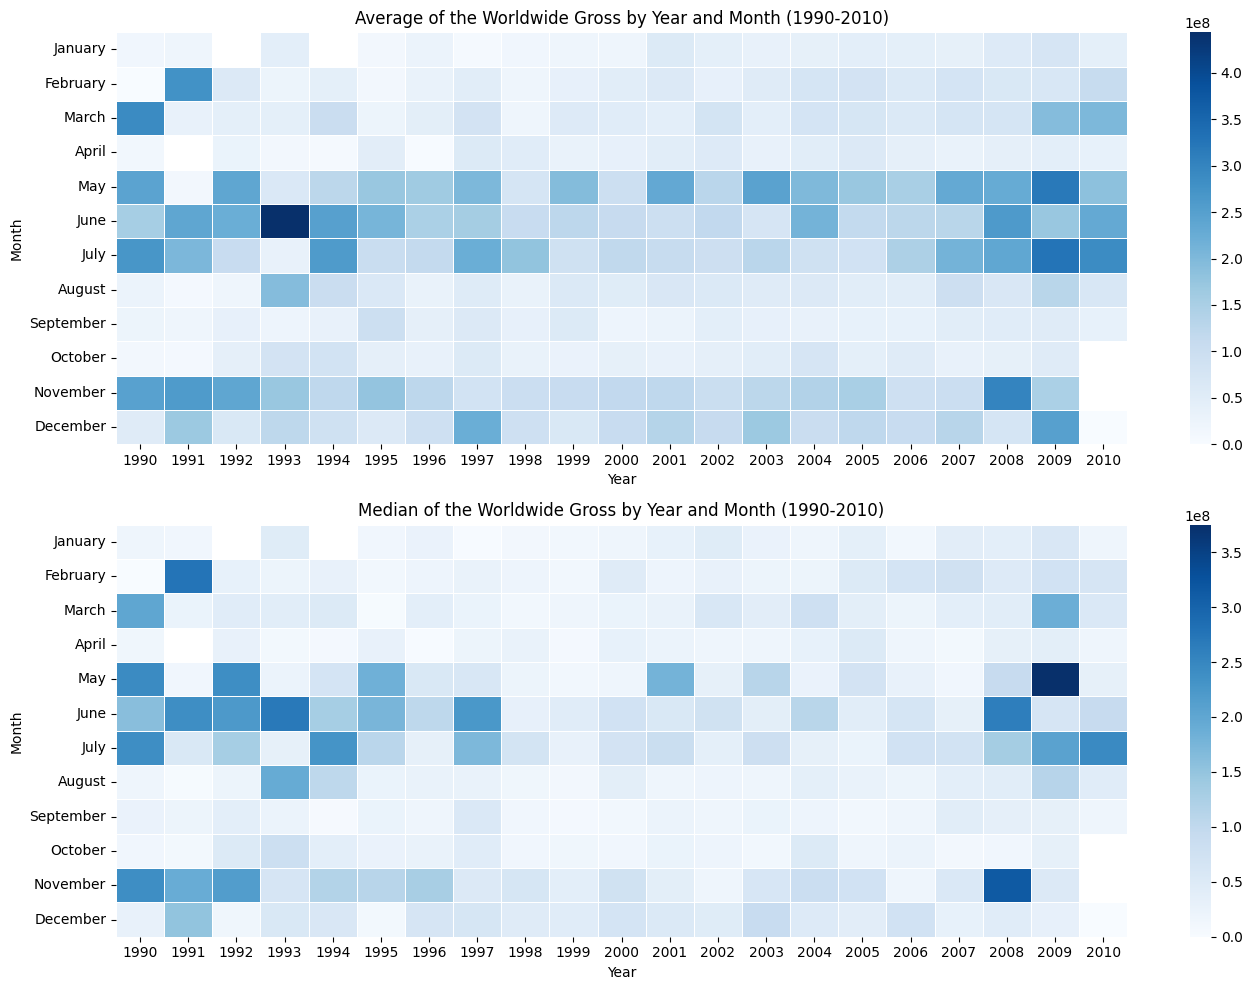

In [24]:
# Filter data for years between 1990 and 2010
filtered_gross_by_year_month = gross_by_year_month[(gross_by_year_month['Year'] >= 1990) & (gross_by_year_month['Year'] <= 2010)]

# Pivot tables for heatmap visualization (1990-2010)
avg_gross_pivot_filtered = filtered_gross_by_year_month.pivot(index='Month', columns='Year', values='mean')
median_gross_pivot_filtered = filtered_gross_by_year_month.pivot(index='Month', columns='Year', values='median')

# Reorder months for proper visualization
avg_gross_pivot_filtered = avg_gross_pivot_filtered.reindex(month_order)
median_gross_pivot_filtered = median_gross_pivot_filtered.reindex(month_order)

# Plot heatmaps for average and median worldwide gross (1990-2010)
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Average Gross Heatmap
sns.heatmap(avg_gross_pivot_filtered, cmap="Blues", linewidths=0.5, ax=axes[0])
axes[0].set_title("Average of the Worldwide Gross by Year and Month (1990-2010)")

# Median Gross Heatmap
sns.heatmap(median_gross_pivot_filtered, cmap="Blues", linewidths=0.5, ax=axes[1])
axes[1].set_title("Median of the Worldwide Gross by Year and Month (1990-2010)")

plt.tight_layout()
plt.show()


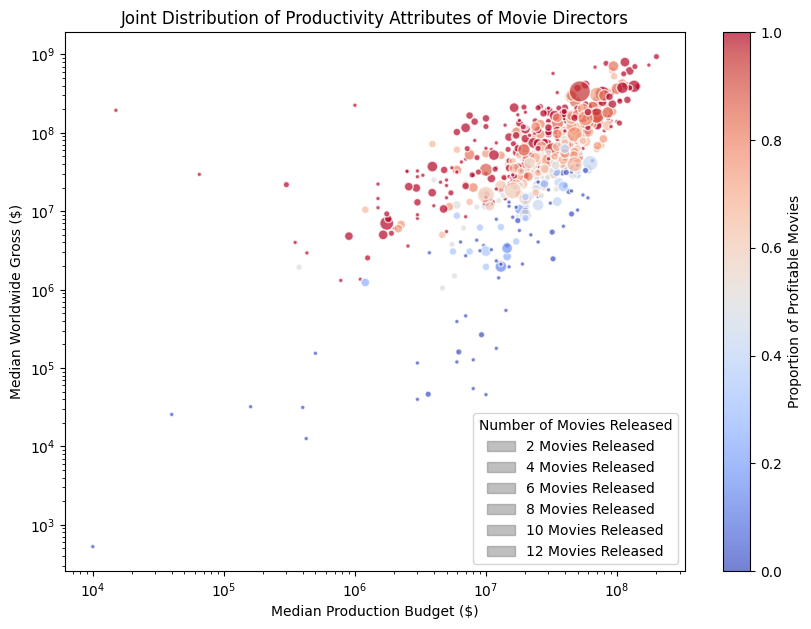

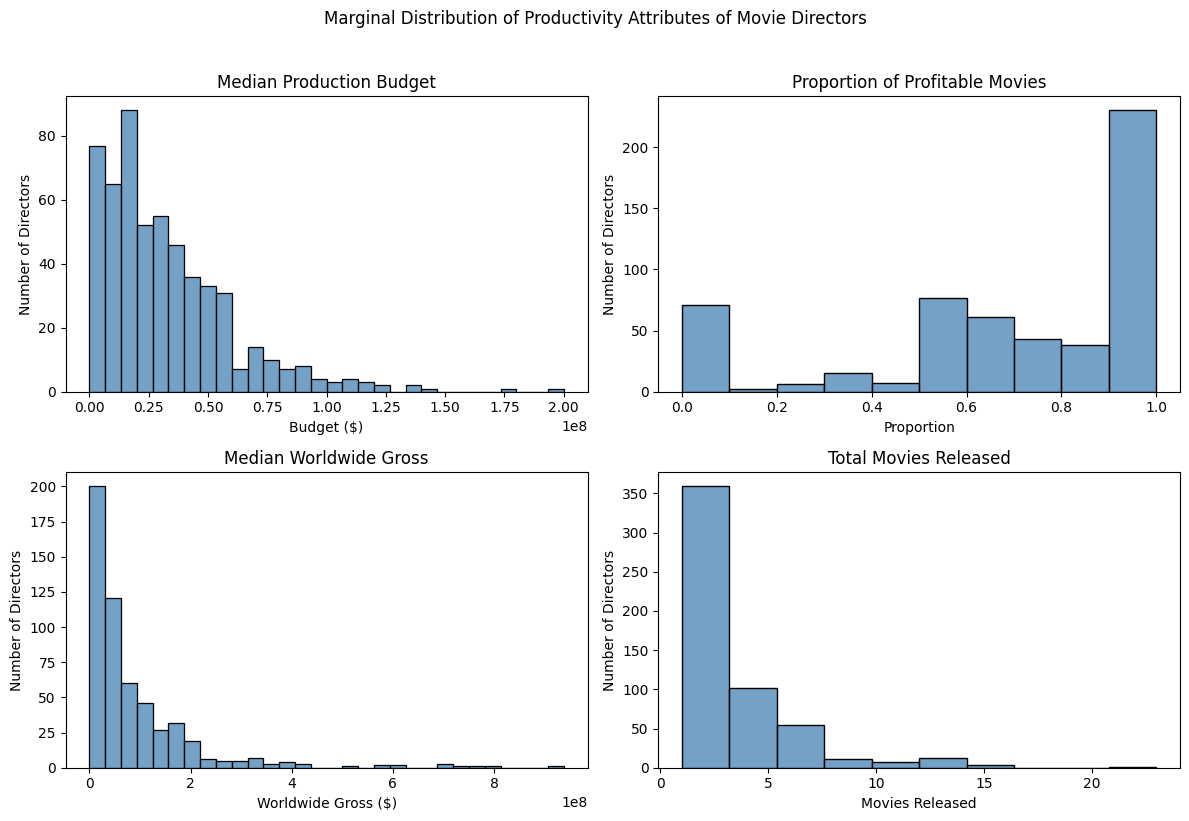

In [20]:
# Aggregate data by director
director_stats = movies_df.dropna(subset=['Director', 'Worldwide_Gross', 'Production_Budget'])
director_grouped = director_stats.groupby('Director').agg(
    median_budget=('Production_Budget', 'median'),
    median_gross=('Worldwide_Gross', 'median'),
    total_movies=('Title', 'count'),
    profitable_movies=('Profit', lambda x: (x > 0).mean())  # Proportion of profitable movies
).reset_index()

# Define bubble size based on total movies released
bubble_size = director_grouped['total_movies'] * 10

# Scatter Plot: Median Production Budget vs Median Worldwide Gross
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    director_grouped['median_budget'], director_grouped['median_gross'],
    s=bubble_size, c=director_grouped['profitable_movies'], cmap='coolwarm', alpha=0.7, edgecolors="w"
)

# Add colorbar and labels
cbar = plt.colorbar(scatter)
cbar.set_label("Proportion of Profitable Movies")
plt.xlabel("Median Production Budget ($)")
plt.ylabel("Median Worldwide Gross ($)")
plt.title("Joint Distribution of Productivity Attributes of Movie Directors")
plt.xscale('log')
plt.yscale('log')

# Legend for bubble sizes
legend_sizes = [2, 4, 6, 8, 10, 12]
legend_patches = [mpatches.Circle((0, 0), size * 10, color='gray', alpha=0.5, label=f"{size} Movies Released") for size in legend_sizes]
plt.legend(handles=legend_patches, title="Number of Movies Released", loc="lower right")

plt.show()

# ---- Marginal Distributions ----
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Histogram: Median Production Budget
sns.histplot(director_grouped['median_budget'], bins=30, ax=axes[0, 0], color="steelblue")
axes[0, 0].set_title("Median Production Budget")
axes[0, 0].set_xlabel("Budget ($)")
axes[0, 0].set_ylabel("Number of Directors")

# Histogram: Median Worldwide Gross
sns.histplot(director_grouped['median_gross'], bins=30, ax=axes[1, 0], color="steelblue")
axes[1, 0].set_title("Median Worldwide Gross")
axes[1, 0].set_xlabel("Worldwide Gross ($)")
axes[1, 0].set_ylabel("Number of Directors")

# Histogram: Proportion of Profitable Movies
sns.histplot(director_grouped['profitable_movies'], bins=10, ax=axes[0, 1], color="steelblue")
axes[0, 1].set_title("Proportion of Profitable Movies")
axes[0, 1].set_xlabel("Proportion")
axes[0, 1].set_ylabel("Number of Directors")

# Histogram: Total Movies Released
sns.histplot(director_grouped['total_movies'], bins=10, ax=axes[1, 1], color="steelblue")
axes[1, 1].set_title("Total Movies Released")
axes[1, 1].set_xlabel("Movies Released")
axes[1, 1].set_ylabel("Number of Directors")


plt.suptitle("Marginal Distribution of Productivity Attributes of Movie Directors", y=1.02)
plt.tight_layout()
plt.show()